# Análisis de datos - Trabajo final integrador

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQATNC-EBwF-LIbDVv_L0gkP2V6oKQzah5GRg&usqp=CAU"/>

Se propone realizar el ciclo completo del desarrollo de un modelo de aprendizaje automático supervisado.

Trabajaremos con un [dataset de Kaggle con datos de por distintas estaciones metereológicas de Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv).

El objetivo es predecir si lloverá o no al día siguiente (variable *RainTomorrow*), en función datos metereológicos del día actual.


## Enunciado

- Descargar el [dataset de kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv)

### 1. Análisis exploratorio inicial

- Visualizar las primeras filas.
- Realizar un resumen de 5 números.
- Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
- Identificar las variables de entrada y de salida del problema.
- Variables de entrada:
  - Realizar los siguientes análisis por tipo de variable.
    - Numéricas: 
      - Obtener conclusiones acerca de la distribución de los datos.
    - Categóricas
        - Obtener conclusiones acerca de cardinalidad, representación de cada categoría, etc.
    - Compuestas/otros. ¿Cómo pueden tratarse para utilizarlas en el problema elegido?
- Variables de salida:
  - ¿Están balanceadas las clases?
  - ¿Qué técnicas consideraría para codificar la variable de salida? Justificar.

### 2. Esquema de validación de resultados

- Los pasos siguientes comprenden las etapas de preparación de datos y evaluación de resultados. 
- Para ello, se debe particionar el dataset en entrenamiento y validación.

### 3. Limpieza y preparación de datos / ingeniería de features

- Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.
- ¿Qué supuestos puede realizar acerca de los datos faltantes? ¿Qué técnicas de imputación recomendaría?. Ensayar distintas técnicas y analizar los resultados. 
- En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable. Cuando lo considere apropiado, ensayar distintas técnicas y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. Nota: para tipos de datos compuestos o estructurados, considerar la obtención de variables de tipo númerico/categórico.
- ¿Qué puede decir acerca de las relaciones entre las variables de entrada?

- Antes de entrenar un modelo de aprendizaje automático, ¿Podría identificar las variables de entrada de mayor importancia?. Considerar por lo menos dos técnicas para cada variable. Explique brevemente los métodos utilizados.

### 4. Entrenamiento de modelos

- Recurriendo a los modelos que conozca, defina una lista de modelos candidatos a entrenar (puede ser el mismo tipo de clasificador con distintos hiperparámetros). Nota: no se contemplará el desempeño del modelo elegido, sino las conclusiones que puedan establecerse a partir de la preparación previa de los datos.

- Ensaye distintas cadenas de procesamiento con las técnicas consideradas en la sección 3 (por ejemplo, distintas técnicas de imputación, selección de variables de entrada, codificación de variables categóricas, transformación, etc.).

### 5. Evaluación de resultados y conclusiones

- ¿Qué puede concluir acerca de los modelos y preparaciones de datos ensayadas? Tener en cuenta como cada preparación afecta a los distintos modelos.

### 6. Presentación de resultados

- Elabore un informe de dos o tres páginas describiendo el procedimiento realizado y las conclusiones importantes indicando la ruta del código fuente en git.


## Desarrollo

### 1. Análisis exploratorio inicial
Visualizar las primeras filas.
Realizar un resumen de 5 números.
Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
Identificar las variables de entrada y de salida del problema.
Variables de entrada:
Realizar los siguientes análisis por tipo de variable.
Numéricas:
Obtener conclusiones acerca de la distribución de los datos.
Categóricas
Obtener conclusiones acerca de cardinalidad, representación de cada categoría, etc.
Compuestas/otros. ¿Cómo pueden tratarse para utilizarlas en el problema elegido?
Variables de salida:
¿Están balanceadas las clases?
¿Qué técnicas consideraría para codificar la variable de salida? Justificar.

In [765]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import re

#### Defino una función que me asegura si puedo aplicar CCA

Defino una función que me devuelve el porcentaje de valores nulos dada una colunna.

In [766]:
def porcentaje_nulos(columna):
    m = columna.shape[0]
    num_nul = columna.isnull().sum()
    porc_nul = (num_nul * 100)/m
    return porc_nul
    

Función que  devuelve en booleano si una determinada columna tiene o no el numero de valores nulos mayor al 5% del dataset

In [767]:
def cca(columna):
    m = columna.shape[0]
    porc_minimo = (5*m)/100
    num_nul = columna.isnull().sum()
    if num_nul < porc_minimo:
        return True
    else:
        return False

?

In [768]:
def display_dataset_distributions(dataset):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10))
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()

Función que dada una lista donde figuran los nombres de determinadas columnas, devuelve cuales tienen valores nulos menores al 5% y cuales no.

In [769]:
def col_cca_nocca(columnas):    
    cca_columns = []
    no_cca_columns = []
    for i in columnas:
        if cca(df[i]):
            cca_columns.append(i)
        else:
            no_cca_columns.append(i)
    return cca_columns, no_cca_columns

Función que devuelve en booleano si una columna tiene mas de 35% de datos faltantes

In [770]:
def mayor_35(columnas):
    m = columnas.shape[0]
    porc_minimo = (35*m)/100
    num_nul = columnas.isnull().sum()
    if num_nul > porc_minimo:
        return True
    else:
        return False
    

Función que dada una lista donde figuran los nombres de determinadas columnas, devuelve cuales tienen valores nulos menores al 35% y cuales no.

In [771]:
def col_mayor_35(columnas):    
    col_mayor_35 = []
    no_col_mayor_35 = []
    for i in columnas:
        if mayor_35(df[i]):
            col_mayor_35.append(i)
        else:
            no_col_mayor_35.append(i)
    return col_mayor_35, no_col_mayor_35

Función que separa strings que tiene dos palabras unidas en formato camel case

In [772]:
 def camel_case_split(str):
        splitted = re.findall(r'[A-Z](?:[a-z]+|[A-Z]*(?=[A-Z]|$))', str)
        joined = ' '.join(splitted)
        return joined

# 1.- Análisis exploratorio inicial

In [773]:
df = pd.read_csv("weatherAUS.csv")
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [917]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103223 entries, 0 to 103222
Data columns (total 62 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Location         103223 non-null  float64
 1   MinTemp          103223 non-null  float64
 2   MaxTemp          103223 non-null  float64
 3   Rainfall         103223 non-null  float64
 4   WindGustSpeed    103223 non-null  float64
 5   WindSpeed9am     103223 non-null  float64
 6   WindSpeed3pm     103223 non-null  float64
 7   Humidity9am      103223 non-null  float64
 8   Humidity3pm      103223 non-null  float64
 9   Pressure9am      103223 non-null  float64
 10  Pressure3pm      103223 non-null  float64
 11  Temp9am          103223 non-null  float64
 12  Temp3pm          103223 non-null  float64
 13  RainToday        103223 non-null  float64
 14  RainTomorrow     103223 non-null  float64
 15  Month            103223 non-null  float64
 16  Location_        103223 non-null  floa

In [918]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,103223.0,0.335841,0.370128,0.0,0.077511,0.111692,0.821827,1.0
MinTemp,103223.0,0.485192,0.152281,0.0,0.375297,0.477435,0.591449,1.0
MaxTemp,103223.0,0.455356,0.155342,0.0,0.331868,0.441758,0.571429,1.0
Rainfall,103223.0,0.006164,0.022524,0.0,0.000000,0.000000,0.001632,1.0
WindGustSpeed,103223.0,0.257115,0.099401,0.0,0.193798,0.255814,0.310078,1.0
...,...,...,...,...,...,...,...,...
WindDir3pm_SSW,103223.0,0.056422,0.230735,0.0,0.000000,0.000000,0.000000,1.0
WindDir3pm_SW,103223.0,0.064821,0.246211,0.0,0.000000,0.000000,0.000000,1.0
WindDir3pm_W,103223.0,0.069268,0.253910,0.0,0.000000,0.000000,0.000000,1.0
WindDir3pm_WNW,103223.0,0.063445,0.243763,0.0,0.000000,0.000000,0.000000,1.0


In [775]:
df.count().sort_values()

Sunshine          75625
Evaporation       82670
Cloud3pm          86102
Cloud9am          89572
Pressure9am      130395
Pressure3pm      130432
WindDir9am       134894
WindGustDir      135134
WindGustSpeed    135197
Humidity3pm      140953
WindDir3pm       141232
Temp3pm          141851
RainTomorrow     142193
RainToday        142199
Rainfall         142199
WindSpeed3pm     142398
Humidity9am      142806
Temp9am          143693
WindSpeed9am     143693
MinTemp          143975
MaxTemp          144199
Location         145460
Date             145460
dtype: int64

### Vemos como van los datos nulos

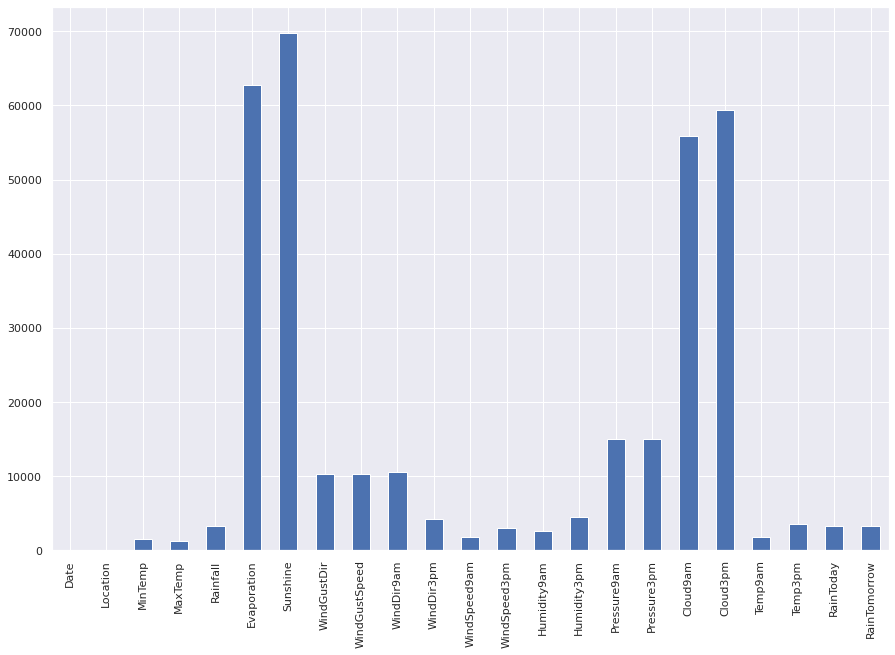

In [776]:
df.isnull().sum().plot(kind='bar', figsize=(15, 10))
plt.show()

In [777]:
columnas = np.array(df.columns)
col_mayor_35, no_col_mayor_35 = col_mayor_35(columnas)
print(col_mayor_35)
print(no_col_mayor_35)

['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']
['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [778]:
# Elimino los que tengan mas del 50% de datos faltantes
df = df.drop(columns=col_mayor_35,axis=1)

In [779]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,16.990631,21.68339
std,6.398495,7.119049,8.478060,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,40.200000,46.70000


<AxesSubplot:>

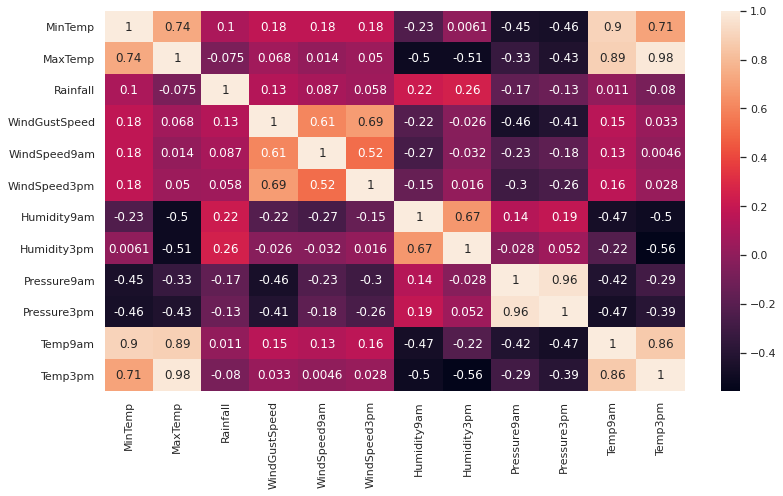

In [780]:
plt.figure(figsize=(13,7))

sns.heatmap(df.corr(),annot=True)

###  Vemos a detalle las variables categoricas

In [781]:
col_categorical = [var for var in df.columns if df[var].dtype=='O']

In [782]:
col_categorical

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [783]:
# Reviamos la cardinalidad de las columnas categoricas
for i in col_categorical:
    print(f"{i}: {len(df[i].unique())} etiquetas")

Date: 3436 etiquetas
Location: 49 etiquetas
WindGustDir: 17 etiquetas
WindDir9am: 17 etiquetas
WindDir3pm: 17 etiquetas
RainToday: 3 etiquetas
RainTomorrow: 3 etiquetas


Vemos que Date tiene una gran cardinalidad, lo cual puede ocasionar problemas posteriores.

In [784]:
df["Date"].head()

0    2008-12-01
1    2008-12-02
2    2008-12-03
3    2008-12-04
4    2008-12-05
Name: Date, dtype: object

Al momento de predecir si llueve o no seria más sencillo tratar la columna en base al mes. 

In [785]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

Incoporamos la columna month y eliminamos Date

In [786]:
df.drop('Date', axis=1, inplace = True)

La segunda columna con mayor cardinalidad es Location

In [787]:
df["Location"].head

<bound method NDFrame.head of 0         Albury
1         Albury
2         Albury
3         Albury
4         Albury
           ...  
145455     Uluru
145456     Uluru
145457     Uluru
145458     Uluru
145459     Uluru
Name: Location, Length: 145460, dtype: object>

In [788]:
from geopy.geocoders import Nominatim
"""
df['gcode'] = df.Location.apply(geolocator.geocode)
df['lat'] = [g.latitude for g in df.gcode]
df['long'] = [g.longitude for g in df.gcode]
"""
locations = df["Location"].unique()
print(locations)

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


Separamos las palabras que estan unidas

In [789]:
locations_pro = []
for i in locations:
    locations_pro.append(camel_case_split(i))

In [790]:
df_locations = pd.DataFrame({'Locations':locations_pro})

In [791]:
df_locations.head()

,Locations
0,Albury
1,Badgerys Creek
2,Cobar
3,Coffs Harbour
4,Moree


In [792]:
df_locations['gcode'] = df_locations.Locations.apply(geolocator.geocode)
df_locations['lat'] = [g.latitude for g in df_locations.gcode]
df_locations['long'] = [g.longitude for g in df_locations.gcode]

In [793]:
df_locations

,Locations,gcode,lat,long
0,Albury,"(Albury, Albury City Council, New South Wales,...",-36.080477,146.916280
1,Badgerys Creek,"(Badgerys Creek, Sydney, Liverpool City Counci...",-33.881667,150.744163
2,Cobar,"(Cobar, Cobar Shire Council, New South Wales, ...",-31.498333,145.834444
3,Coffs Harbour,"(Coffs Harbour, Coffs Harbour City Council, Ne...",-30.296241,153.113529
4,Moree,"(Morée, Vendôme, Loir-et-Cher, Centre-Val de L...",47.901594,1.237803
5,Newcastle,"(Newcastle upon Tyne, Tyne and Wear, North Eas...",54.973847,-1.613157
6,Norah Head,"(Norah Head, Central Coast Council, New South ...",-33.281667,151.567778
7,Norfolk Island,"(Norfolk Island, Burnt Pine, Norfolk Island, 2...",-29.028958,167.958729
8,Penrith,"(Penrith, Eden, Cumbria, North West England, E...",54.663913,-2.752205
9,Richmond,"(Richmond, Virginia, United States, (37.538508...",37.538509,-77.434280


In [794]:
df_loc_name = pd.DataFrame({'Location':locations_pro})

In [795]:
df_loc_name.head()

,Location
0,Albury
1,Badgerys Creek
2,Cobar
3,Coffs Harbour
4,Moree


In [796]:
dict_loc = dict(zip(locations,locations_pro))

In [797]:
dict_loc

{'Albury': 'Albury',
 'BadgerysCreek': 'Badgerys Creek',
 'Cobar': 'Cobar',
 'CoffsHarbour': 'Coffs Harbour',
 'Moree': 'Moree',
 'Newcastle': 'Newcastle',
 'NorahHead': 'Norah Head',
 'NorfolkIsland': 'Norfolk Island',
 'Penrith': 'Penrith',
 'Richmond': 'Richmond',
 'Sydney': 'Sydney',
 'SydneyAirport': 'Sydney Airport',
 'WaggaWagga': 'Wagga Wagga',
 'Williamtown': 'Williamtown',
 'Wollongong': 'Wollongong',
 'Canberra': 'Canberra',
 'Tuggeranong': 'Tuggeranong',
 'MountGinini': 'Mount Ginini',
 'Ballarat': 'Ballarat',
 'Bendigo': 'Bendigo',
 'Sale': 'Sale',
 'MelbourneAirport': 'Melbourne Airport',
 'Melbourne': 'Melbourne',
 'Mildura': 'Mildura',
 'Nhil': 'Nhil',
 'Portland': 'Portland',
 'Watsonia': 'Watsonia',
 'Dartmoor': 'Dartmoor',
 'Brisbane': 'Brisbane',
 'Cairns': 'Cairns',
 'GoldCoast': 'Gold Coast',
 'Townsville': 'Townsville',
 'Adelaide': 'Adelaide',
 'MountGambier': 'Mount Gambier',
 'Nuriootpa': 'Nuriootpa',
 'Woomera': 'Woomera',
 'Albany': 'Albany',
 'Witchcliffe':

In [798]:
df['Location'].map(dict_loc) 

0         Albury
1         Albury
2         Albury
3         Albury
4         Albury
           ...  
145455     Uluru
145456     Uluru
145457     Uluru
145458     Uluru
145459     Uluru
Name: Location, Length: 145460, dtype: object

In [799]:
df['Location_'] = df['Location']

In [800]:
df['Location'] = df['Location'].map(df_locations.set_index('Locations')['lat'])

In [801]:
df['Location_'] = df['Location_'].map(df_locations.set_index('Locations')['long'])

In [802]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Location_
0,-36.080477,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,12,146.91628
1,-36.080477,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,12,146.91628
2,-36.080477,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,12,146.91628
3,-36.080477,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,12,146.91628
4,-36.080477,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,12,146.91628


Volvemos a ver las columnas con alta cardinalidad

In [803]:
col_categorical = [var for var in df.columns if df[var].dtype=='O']
for i in col_categorical:
    print(f"{i}: {len(df[i].unique())} etiquetas")

WindGustDir: 17 etiquetas
WindDir9am: 17 etiquetas
WindDir3pm: 17 etiquetas
RainToday: 3 etiquetas
RainTomorrow: 3 etiquetas


Vemos cuales ed las columnas tienen nulos no mayor al 5$ del dataset

In [804]:
for i in col_categorical:
    print(f"{i}: {cca(df[i])}")

WindGustDir: False
WindDir9am: False
WindDir3pm: True
RainToday: True
RainTomorrow: True


Vemos que RainToday y RainTomorrow tienen nulos menor al 5% del dataset. Recordar que RainTomorrow es nuestro target.

Veremos las frecuencias de las etiquetas de las columnas sobre Wind

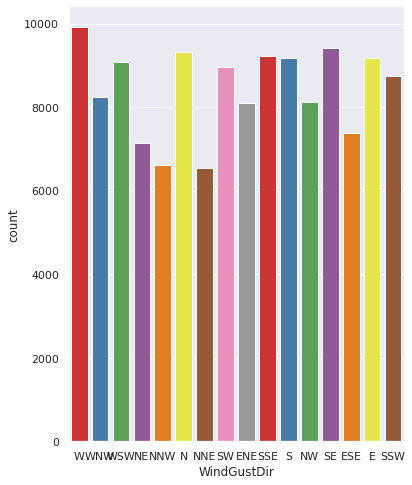

In [805]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="WindGustDir", data=df, palette="Set1")
plt.show()

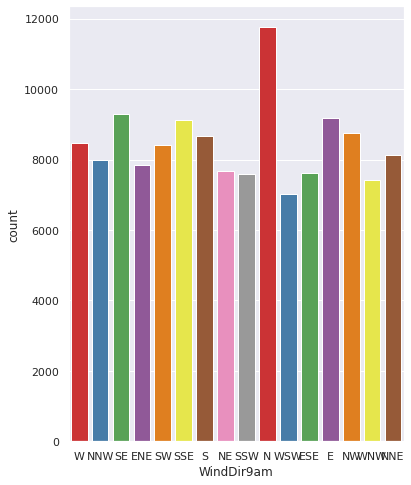

In [806]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="WindDir9am", data=df, palette="Set1")
plt.show()

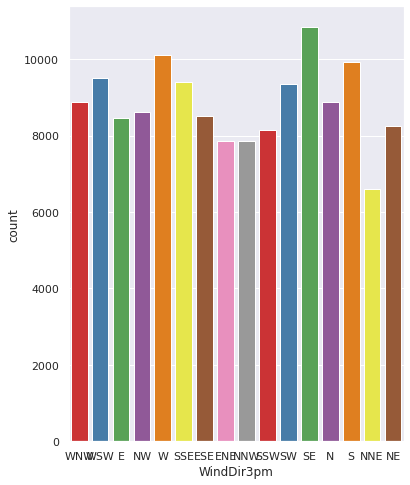

In [807]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="WindDir3pm", data=df, palette="Set1")
plt.show()

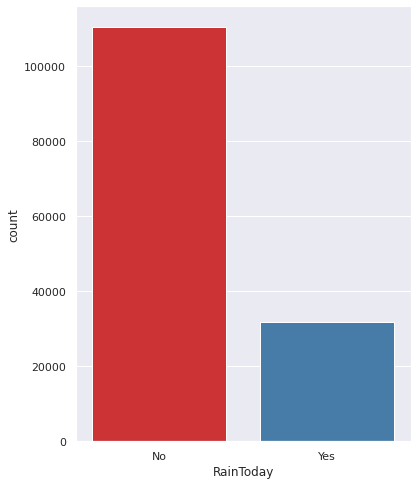

In [808]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainToday", data=df, palette="Set1")
plt.show()

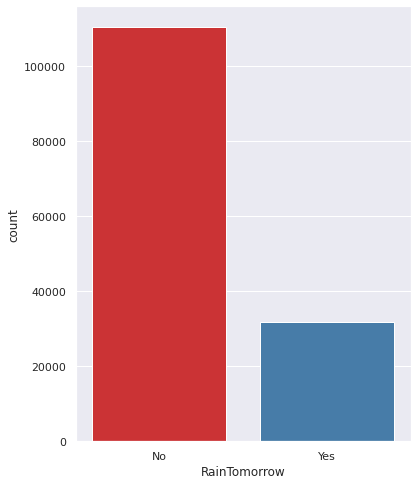

In [809]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=df, palette="Set1")
plt.show()

Ahora veremos sobre las columnas numericas

In [810]:
numerical_col = df._get_numeric_data().columns

In [811]:
for i in numerical_col:
    print(f"{i}: {cca(df[i])}")

Location: False
MinTemp: True
MaxTemp: True
Rainfall: True
WindGustSpeed: False
WindSpeed9am: True
WindSpeed3pm: True
Humidity9am: True
Humidity3pm: True
Pressure9am: False
Pressure3pm: False
Temp9am: True
Temp3pm: True
Month: True
Location_: False


De estas columnas, las que si pueden recibir distintos tratamientos puesto que tienen valores nulos menores a 5% son:
* MinTemp
* MaxTemp
* Rainfall
* WindSpeed9am
* WindSpeed3pm
* Humidity9am
* Humidity3pm
* Temp9am
* Temp3pm
* Month

Las columnas que tienen nulos mayor al 5% son:
* WindGustSpeed
* Pressure9am
* Pressure3pm


In [812]:
"""
# Debido a la alta correlación eliminamos Temp3pm y Temp9pm
df.drop(['Temp3pm','Temp9am'],axis=1,inplace=True)
"""

"\n# Debido a la alta correlación eliminamos Temp3pm y Temp9pm\ndf.drop(['Temp3pm','Temp9am'],axis=1,inplace=True)\n"

In [813]:
"""
#Location y date no serán usados por lo que serán eliminados
df.drop(['Date','Location'],axis=1,inplace=True)
"""

"\n#Location y date no serán usados por lo que serán eliminados\ndf.drop(['Date','Location'],axis=1,inplace=True)\n"

In [814]:
"""
display_dataset_distributions(df)
"""

'\ndisplay_dataset_distributions(df)\n'

# Limpieza y preparación de datos / ingeniería de features

#### Columnas numericas que tienen menos del 5% del dataset con datos faltantes

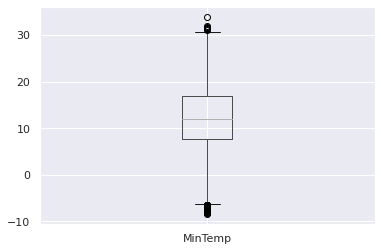

In [815]:
df.boxplot(column='MinTemp', return_type='axes');

In [816]:
df['MinTemp'].fillna((df['MinTemp'].mean()), inplace=True)

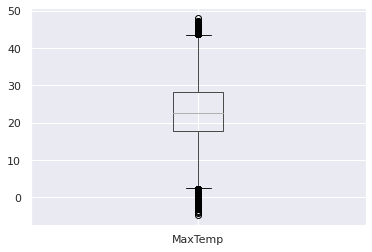

In [817]:
df.boxplot(column='MaxTemp', return_type='axes');

In [818]:
df['MaxTemp'].fillna((df['MaxTemp'].mean()), inplace=True)

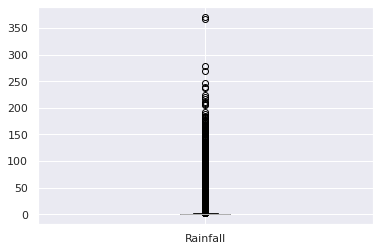

In [819]:
df.boxplot(column='Rainfall', return_type='axes');

In [820]:
df['Rainfall'].fillna((df['Rainfall'].median()), inplace=True)

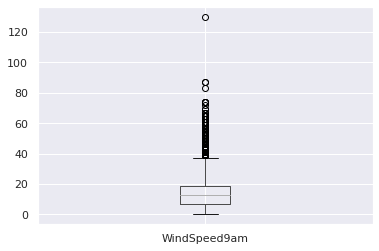

In [821]:
df.boxplot(column='WindSpeed9am', return_type='axes');

In [822]:
df['WindSpeed9am'].fillna((df['WindSpeed9am'].median()), inplace=True)

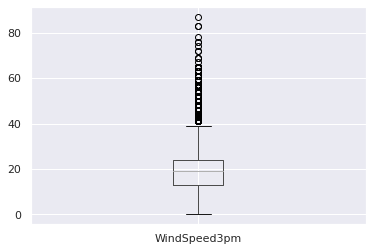

In [823]:
df.boxplot(column='WindSpeed3pm', return_type='axes');

In [824]:
df['WindSpeed3pm'].fillna((df['WindSpeed3pm'].median()), inplace=True)

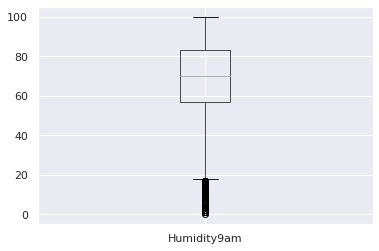

In [825]:
df.boxplot(column='Humidity9am', return_type='axes');

In [826]:
df['Humidity9am'].fillna((df['Humidity9am'].median()), inplace=True)

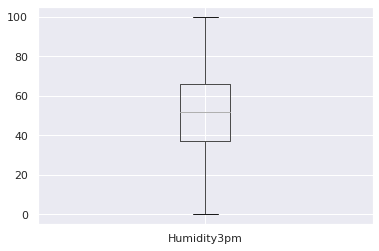

In [827]:
df.boxplot(column='Humidity3pm', return_type='axes');

In [828]:
df['Humidity3pm'].fillna((df['Humidity3pm'].mean()), inplace=True)

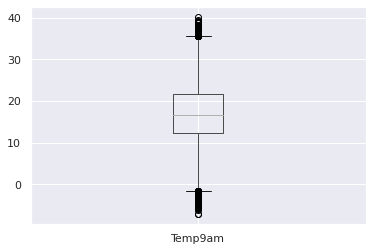

In [829]:
df.boxplot(column='Temp9am', return_type='axes');

In [830]:
df['Temp9am'].fillna((df['Temp9am'].mean()), inplace=True)

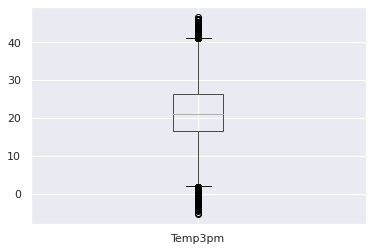

In [831]:
df.boxplot(column='Temp3pm', return_type='axes');

In [832]:
df['Temp3pm'].fillna((df['Temp3pm'].mean()), inplace=True)

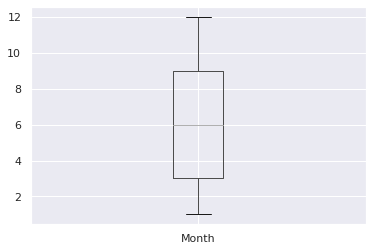

In [833]:
df.boxplot(column='Month', return_type='axes');

In [834]:
df['Month'].fillna((df['Month'].mean()), inplace=True)

#### Columnas numericas  que tienen más del 5% del dataset con datos faltantes

array([[<AxesSubplot:title={'center':'Location'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>],
       [<AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>],
       [<AxesSubplot:title={'center':'Location_'}>, <AxesSubplot:>]],
      dtype=object)

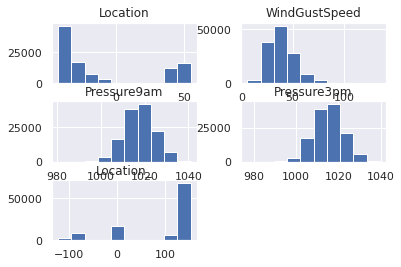

In [835]:
columnas = np.array(df.columns)
cca_columns, no_cca_columns = col_cca_nocca(columnas)
numerical_col = df[no_cca_columns]._get_numeric_data().columns
df[numerical_col].hist()

In [836]:
df["WindGustSpeed"].fillna(value=df["WindGustSpeed"].median(), inplace=True)

In [837]:
df["Pressure3pm"].fillna(value=df["Pressure3pm"].mean(), inplace=True)

In [838]:
df["Pressure9am"].fillna(value=df["Pressure9am"].mean(), inplace=True)

#### Revisamos como van los datos nulos al momento

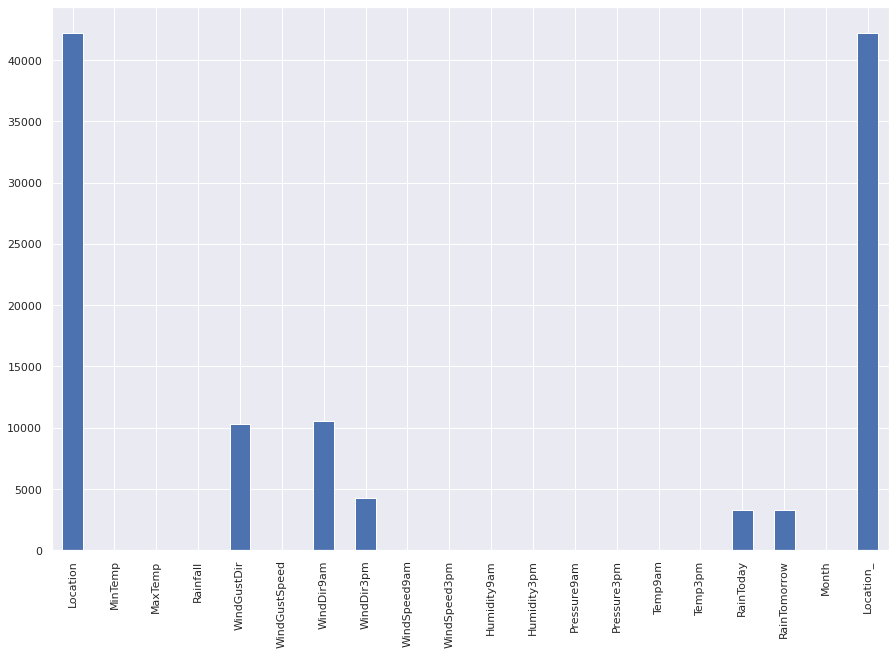

In [839]:
df.isnull().sum().plot(kind='bar', figsize=(15, 10))
plt.show()

En el caso de location (latitud) y la location_ (longitud) vamos a eliminar los datos nulos

### Hacemos tratamiento para categorical data 

In [840]:
df[cca_columns].columns[df[cca_columns].isna().any()].tolist()

['WindDir3pm', 'RainToday', 'RainTomorrow']

In [841]:
cat_variables = df[["WindGustDir","WindDir9am","WindDir3pm"]]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
cat_dummies.head()

,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [842]:
df = df.drop(["WindGustDir","WindDir9am","WindDir3pm"], axis=1)
df = pd.concat([df, cat_dummies], axis=1)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,-36.080477,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,...,0,0,0,0,0,0,0,0,1,0
1,-36.080477,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,...,0,0,0,0,0,0,0,0,0,1
2,-36.080477,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,...,0,0,0,0,0,0,0,0,0,1
3,-36.080477,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,...,0,0,0,0,0,0,0,0,0,0
4,-36.080477,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,...,0,1,0,0,0,0,0,0,0,0


In [843]:
df.isna().sum()

Location          42237
MinTemp               0
MaxTemp               0
Rainfall              0
WindGustSpeed         0
                  ...  
WindDir3pm_SSW        0
WindDir3pm_SW         0
WindDir3pm_W          0
WindDir3pm_WNW        0
WindDir3pm_WSW        0
Length: 62, dtype: int64

In [844]:
df["RainToday"].unique()

array(['No', 'Yes', nan], dtype=object)

In [845]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [846]:
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,-36.080477,13.4,22.900000,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,...,0,0,0,0,0,0,0,0,1,0
1,-36.080477,7.4,25.100000,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,...,0,0,0,0,0,0,0,0,0,1
2,-36.080477,12.9,25.700000,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,...,0,0,0,0,0,0,0,0,0,1
3,-36.080477,9.2,28.000000,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,...,0,0,0,0,0,0,0,0,0,0
4,-36.080477,17.5,32.300000,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,-25.344857,2.8,23.400000,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,...,0,0,0,0,0,0,0,0,0,0
145456,-25.344857,3.6,25.300000,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,...,0,0,0,0,0,0,0,0,0,0
145457,-25.344857,5.4,26.900000,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,...,0,0,0,0,0,0,0,0,1,0
145458,-25.344857,7.8,27.000000,0.0,28.0,13.0,7.0,51.0,24.0,1019.4,...,0,0,0,0,0,0,0,0,0,0


In [847]:
#df = df.drop(["RainTomorrow"], axis=1)from sklearn.preprocessing import MinMaxScaler


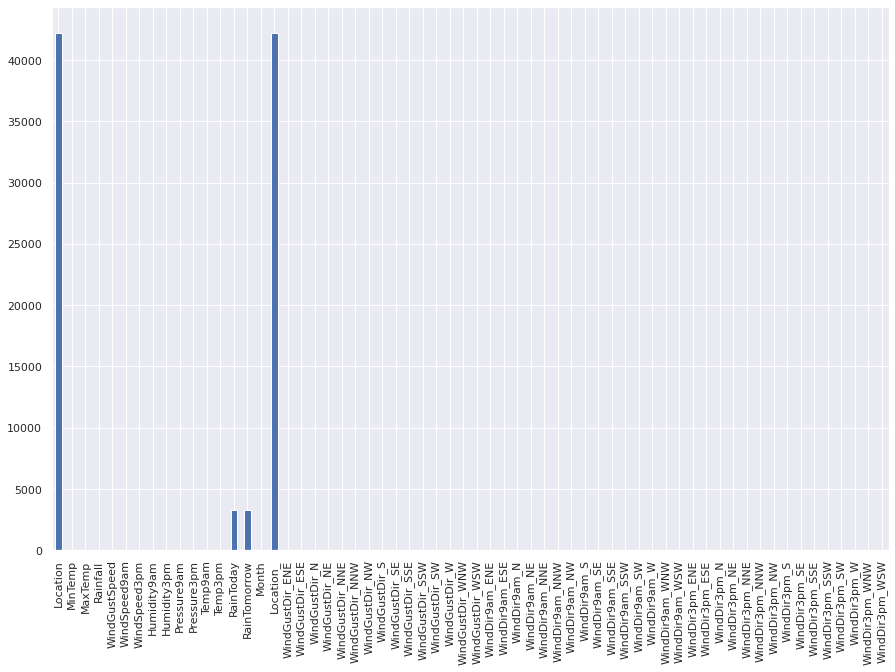

In [849]:
df.isnull().sum().plot(kind='bar', figsize=(15, 10))
plt.show()

Reemplazar valores en los registros faltantes de location (latitud) y location_(longitud) es trival.

In [850]:
cca(df["RainToday"])

True

In [863]:
df.shape

(145460, 62)

In [864]:
df = df[df['Location'].notna()]

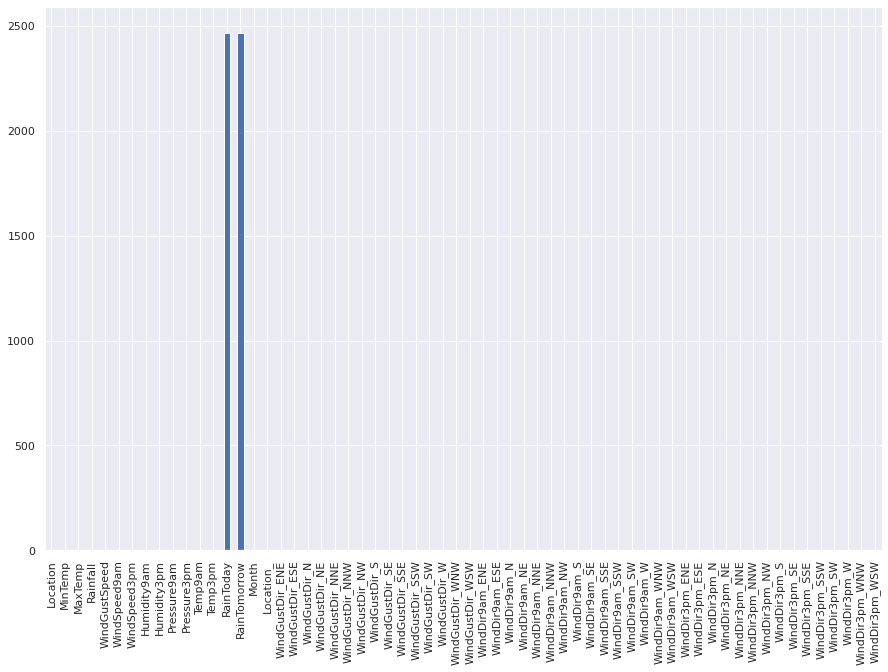

In [865]:
df.isnull().sum().plot(kind='bar', figsize=(15, 10))
plt.show()

In [866]:
df.shape

(103223, 62)

In [867]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0.06951,0.513064,0.446154,0.001632,0.294574,0.153846,0.289157,0.71,0.22,0.435593,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.06951,0.370546,0.494505,0.000000,0.294574,0.030769,0.265060,0.44,0.25,0.484746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.06951,0.501188,0.507692,0.000000,0.310078,0.146154,0.313253,0.38,0.30,0.433898,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.06951,0.413302,0.558242,0.000000,0.139535,0.084615,0.108434,0.45,0.16,0.603390,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.06951,0.610451,0.652747,0.002720,0.271318,0.053846,0.240964,0.82,0.33,0.488136,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [869]:
df["RainToday"].unique()

array([ 0.,  1., nan])

In [871]:
df["RainTomorrow"].unique()

array([ 0.,  1., nan])

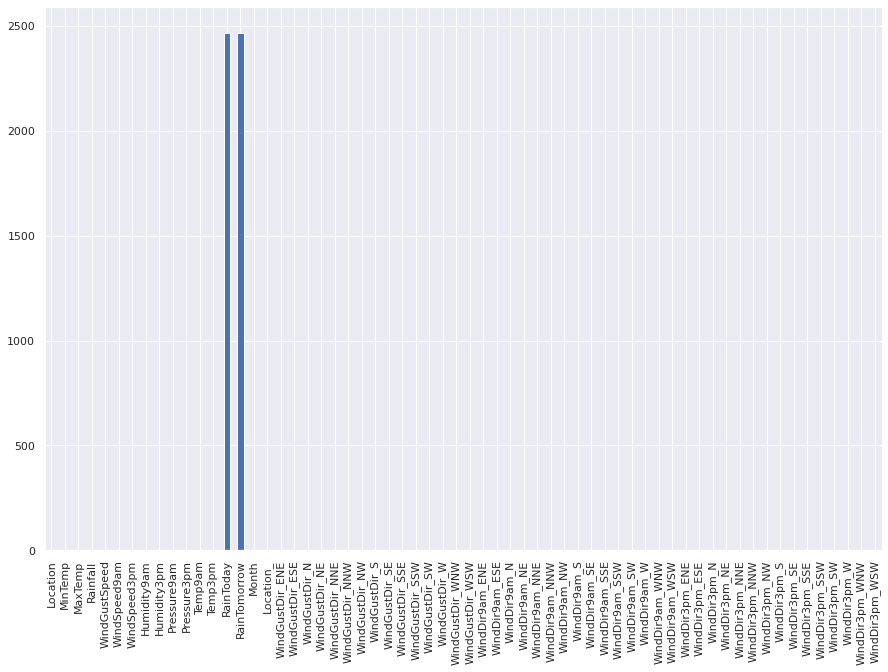

In [872]:
df.isnull().sum().plot(kind='bar', figsize=(15, 10))
plt.show()

In [873]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [876]:
df.isnull().sum()

Location          0
MinTemp           0
MaxTemp           0
Rainfall          0
WindGustSpeed     0
                 ..
WindDir3pm_SSW    0
WindDir3pm_SW     0
WindDir3pm_W      0
WindDir3pm_WNW    0
WindDir3pm_WSW    0
Length: 62, dtype: int64

In [899]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils


In [900]:
X = df.drop(['RainTomorrow'], axis = 1)
y = df['RainTomorrow']
lab_enc = preprocessing.LabelEncoder()
y_ = lab_enc.fit_transform(y)
y_pro = y.astype('int')

In [901]:
X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.30)

In [902]:
from sklearn.linear_model import LogisticRegression


In [903]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103223 entries, 0 to 103222
Data columns (total 61 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Location         103223 non-null  float64
 1   MinTemp          103223 non-null  float64
 2   MaxTemp          103223 non-null  float64
 3   Rainfall         103223 non-null  float64
 4   WindGustSpeed    103223 non-null  float64
 5   WindSpeed9am     103223 non-null  float64
 6   WindSpeed3pm     103223 non-null  float64
 7   Humidity9am      103223 non-null  float64
 8   Humidity3pm      103223 non-null  float64
 9   Pressure9am      103223 non-null  float64
 10  Pressure3pm      103223 non-null  float64
 11  Temp9am          103223 non-null  float64
 12  Temp3pm          103223 non-null  float64
 13  RainToday        103223 non-null  float64
 14  Month            103223 non-null  float64
 15  Location_        103223 non-null  float64
 16  WindGustDir_ENE  103223 non-null  floa

In [915]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
sc = round(100*logreg.score(X_test, y_test),2)
print("Accuracy: " + str(sc) + "%")

Accuracy: 83.13%


/home/fernando/miniconda3/envs/uba/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [912]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(random_state=0).fit(X_train, y_train)
sc2 = round(100*clf2.score(X_test, y_test),2)
print("Accuracy: " + str(sc2) + "%")


Accuracy: 84.36%
